https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

# Orig MLP Classification

# Predict on ALL data

# Train Model

In [39]:
df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE_MM.csv',index_col = 0)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,0.452055,0.048052,0.800000,0.0,0.0,0.122449,0.75,0.600000,0.333333,0.285714,0.0,1.0,1.0,0.951220,0
1,0.287671,0.137581,0.533333,0.0,0.0,0.397959,0.50,0.733333,0.000000,0.428571,0.2,1.0,1.0,0.951220,0
2,0.493151,0.150486,0.400000,0.0,0.0,0.397959,0.50,0.066667,0.333333,0.428571,0.0,0.5,1.0,0.951220,0
3,0.150685,0.220635,0.800000,0.0,0.0,0.397959,0.50,0.600000,0.333333,0.714286,1.0,0.5,0.0,0.121951,0
4,0.273973,0.184219,0.866667,0.0,0.0,0.397959,0.50,0.800000,0.333333,0.285714,1.0,1.0,0.0,0.951220,0


In [25]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
# df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE_5050.csv',index_col = 0)
# df = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE_MM.csv',index_col = 0)

desired_epoch = 50

X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]
print("n_features:",n_features)

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=desired_epoch, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

(29304, 14) (3256, 14) (29304,) (3256,)
n_features: 14
Test Accuracy: 0.838


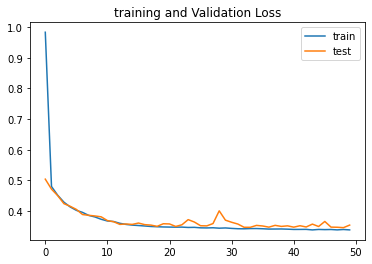

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('training and Validation Loss')
plt.legend()
plt.show()

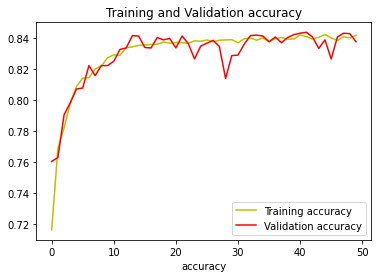

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = [i for i in range(desired_epoch)] #range(1, len(loss)+1)

plt.plot(epochs, acc, 'y',label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r',label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.xlabel('accuracy')
plt.legend()
plt.show()
import requests
def get_pass():
    
    pw = '1729173241:AAH-Xuwdpukn8bVu-nExWWUZsV5bw5cb360'
    chatid = '-516181344'
    
    dict_ = 'Code Passed'
    url1 = 'https://api.telegram.org/bot{}/sendMessage?chat_id={}&text={}&disable_web_page_preview=True&parse_mode=markdown'.format(
        pw, chatid, dict_)
    resp = requests.get(url1)
get_pass()

# Predict for each test row 

In [28]:
# make a prediction
P_list = []

df_test = pd.read_csv('./dataset/adult_test_RenameCol_MinMax_LE_MM.csv',index_col = 0)
for i in range(len(df_test)):
    df_test_topred = df_test.iloc[i, :-1]
    df_test_topred = df_test_topred.to_list()
    df_test_topred = np.array(df_test_topred).reshape(1,-1)
    
    #predict
    yhat = model.predict(df_test_topred)
    P_list.append(yhat[0][0])

    print("yhat[0][0]:",yhat[0][0])
P_list

yhat[0][0]: 0.0417265
yhat[0][0]: 0.19686812
yhat[0][0]: 0.15616313
yhat[0][0]: 0.4738931
yhat[0][0]: 0.04756564
yhat[0][0]: 0.036506712
yhat[0][0]: 0.027436078
yhat[0][0]: 0.5775353
yhat[0][0]: 0.062419683
yhat[0][0]: 0.040767938
yhat[0][0]: 0.39714447
yhat[0][0]: 0.16289416
yhat[0][0]: 0.113342226
yhat[0][0]: 0.07677701
yhat[0][0]: 0.25577188
yhat[0][0]: 0.29430753
yhat[0][0]: 0.08427554
yhat[0][0]: 0.07926461
yhat[0][0]: 0.06983495
yhat[0][0]: 0.34313154
yhat[0][0]: 0.29784805
yhat[0][0]: 0.075775236
yhat[0][0]: 0.035371244
yhat[0][0]: 0.18729702
yhat[0][0]: 0.26044405
yhat[0][0]: 0.4972451
yhat[0][0]: 0.03656143
yhat[0][0]: 0.043827087
yhat[0][0]: 0.19623503
yhat[0][0]: 0.23445174
yhat[0][0]: 0.54685724
yhat[0][0]: 0.0664517
yhat[0][0]: 0.26215982
yhat[0][0]: 0.1549258
yhat[0][0]: 0.0665611
yhat[0][0]: 0.09435579
yhat[0][0]: 0.17968017
yhat[0][0]: 0.021531522
yhat[0][0]: 0.03365606
yhat[0][0]: 0.053333193
yhat[0][0]: 0.36704803
yhat[0][0]: 0.26155084
yhat[0][0]: 0.13700897
yhat[0][

yhat[0][0]: 0.21238062
yhat[0][0]: 0.14025831
yhat[0][0]: 0.054289967
yhat[0][0]: 0.18965614
yhat[0][0]: 0.3830062
yhat[0][0]: 0.28122967
yhat[0][0]: 0.2766202
yhat[0][0]: 0.09416583
yhat[0][0]: 0.052873462
yhat[0][0]: 0.22365028
yhat[0][0]: 0.023362845
yhat[0][0]: 0.15028211
yhat[0][0]: 0.34738111
yhat[0][0]: 0.08957201
yhat[0][0]: 0.17634997
yhat[0][0]: 0.11936399
yhat[0][0]: 0.07345408
yhat[0][0]: 0.10570708
yhat[0][0]: 0.059028774
yhat[0][0]: 0.21911392
yhat[0][0]: 0.12513557
yhat[0][0]: 0.16359079
yhat[0][0]: 0.05933535
yhat[0][0]: 0.13496658
yhat[0][0]: 0.09579292
yhat[0][0]: 0.07749951
yhat[0][0]: 0.049681902
yhat[0][0]: 0.083453655
yhat[0][0]: 0.3752317
yhat[0][0]: 0.12394899
yhat[0][0]: 0.051799
yhat[0][0]: 0.19126594
yhat[0][0]: 0.06997493
yhat[0][0]: 0.051597774
yhat[0][0]: 0.066200316
yhat[0][0]: 0.20512363
yhat[0][0]: 0.07514876
yhat[0][0]: 0.28067368
yhat[0][0]: 0.29700986
yhat[0][0]: 0.16263095
yhat[0][0]: 0.07435998
yhat[0][0]: 0.05783853
yhat[0][0]: 0.1265479
yhat[0][0

yhat[0][0]: 0.28304958
yhat[0][0]: 0.22171238
yhat[0][0]: 0.13818628
yhat[0][0]: 0.07022852
yhat[0][0]: 0.14811304
yhat[0][0]: 0.6184153
yhat[0][0]: 0.08046794
yhat[0][0]: 0.039957047
yhat[0][0]: 0.1979231
yhat[0][0]: 0.17448995
yhat[0][0]: 0.08817795
yhat[0][0]: 0.5381113
yhat[0][0]: 0.057408065
yhat[0][0]: 0.026575238
yhat[0][0]: 0.18228137
yhat[0][0]: 0.16570652
yhat[0][0]: 0.20905548
yhat[0][0]: 0.038194
yhat[0][0]: 0.06690836
yhat[0][0]: 0.062469453
yhat[0][0]: 0.17910808
yhat[0][0]: 0.05151692
yhat[0][0]: 0.21659866
yhat[0][0]: 0.17653668
yhat[0][0]: 0.07408923
yhat[0][0]: 0.10056308
yhat[0][0]: 0.25495702
yhat[0][0]: 0.101067066
yhat[0][0]: 0.09203288
yhat[0][0]: 0.079108864
yhat[0][0]: 0.1529156
yhat[0][0]: 0.18628451
yhat[0][0]: 0.06949508
yhat[0][0]: 0.23946673
yhat[0][0]: 0.23015565
yhat[0][0]: 0.04481855
yhat[0][0]: 0.08372834
yhat[0][0]: 0.20078236
yhat[0][0]: 0.30160314
yhat[0][0]: 0.10987958
yhat[0][0]: 0.08712053
yhat[0][0]: 0.16328713
yhat[0][0]: 0.08627352
yhat[0][0]:

yhat[0][0]: 0.046281517
yhat[0][0]: 0.06500623
yhat[0][0]: 0.058904886
yhat[0][0]: 0.24697942
yhat[0][0]: 0.08110449
yhat[0][0]: 0.08825603
yhat[0][0]: 0.09047237
yhat[0][0]: 0.7483933
yhat[0][0]: 0.10495037
yhat[0][0]: 0.102880836
yhat[0][0]: 0.26714033
yhat[0][0]: 0.53241926
yhat[0][0]: 0.057018995
yhat[0][0]: 0.06022021
yhat[0][0]: 0.06680602
yhat[0][0]: 0.038382262
yhat[0][0]: 0.038978547
yhat[0][0]: 0.17810518
yhat[0][0]: 0.48489743
yhat[0][0]: 0.45670202
yhat[0][0]: 0.13001066
yhat[0][0]: 0.13963425
yhat[0][0]: 0.23365638
yhat[0][0]: 0.27805978
yhat[0][0]: 0.020496458
yhat[0][0]: 0.062478155
yhat[0][0]: 0.08456364
yhat[0][0]: 0.15218124
yhat[0][0]: 0.10397914
yhat[0][0]: 0.07933444
yhat[0][0]: 0.07504079
yhat[0][0]: 0.784811
yhat[0][0]: 0.19054654
yhat[0][0]: 0.39064533
yhat[0][0]: 0.5155202
yhat[0][0]: 0.06517148
yhat[0][0]: 0.059344858
yhat[0][0]: 0.06330711
yhat[0][0]: 0.15894735
yhat[0][0]: 0.17327908
yhat[0][0]: 0.17085487
yhat[0][0]: 0.031524867
yhat[0][0]: 0.28928047
yhat[

yhat[0][0]: 0.12354469
yhat[0][0]: 0.023664057
yhat[0][0]: 0.2279051
yhat[0][0]: 0.20076951
yhat[0][0]: 0.16248119
yhat[0][0]: 0.16233361
yhat[0][0]: 0.4855562
yhat[0][0]: 0.20730129
yhat[0][0]: 0.087263495
yhat[0][0]: 0.22047454
yhat[0][0]: 0.07673681
yhat[0][0]: 0.042684257
yhat[0][0]: 0.26278615
yhat[0][0]: 0.04793927
yhat[0][0]: 0.043906838
yhat[0][0]: 0.18033028
yhat[0][0]: 0.082154274
yhat[0][0]: 0.38807845
yhat[0][0]: 0.11055413
yhat[0][0]: 0.18446791
yhat[0][0]: 0.3048229
yhat[0][0]: 0.41223642
yhat[0][0]: 0.3370098
yhat[0][0]: 0.19002256
yhat[0][0]: 0.1242235
yhat[0][0]: 0.15318573
yhat[0][0]: 0.1571163
yhat[0][0]: 0.19502836
yhat[0][0]: 0.044056088
yhat[0][0]: 0.03567031
yhat[0][0]: 0.218754
yhat[0][0]: 0.11570293
yhat[0][0]: 0.1517784
yhat[0][0]: 0.048587978
yhat[0][0]: 0.2080935
yhat[0][0]: 0.25962046
yhat[0][0]: 0.039904475
yhat[0][0]: 0.07736057
yhat[0][0]: 0.109463215
yhat[0][0]: 0.09992221
yhat[0][0]: 0.56268626
yhat[0][0]: 0.26813427
yhat[0][0]: 0.13697317
yhat[0][0]: 

yhat[0][0]: 0.23872024
yhat[0][0]: 0.098721355
yhat[0][0]: 0.24023733
yhat[0][0]: 0.051726222
yhat[0][0]: 0.11973742
yhat[0][0]: 0.10810423
yhat[0][0]: 0.11614123
yhat[0][0]: 0.11907005
yhat[0][0]: 0.19126284
yhat[0][0]: 0.360743
yhat[0][0]: 0.7373956
yhat[0][0]: 0.19628292
yhat[0][0]: 0.23866871
yhat[0][0]: 0.18371597
yhat[0][0]: 0.1590921
yhat[0][0]: 0.0233846
yhat[0][0]: 0.08291507
yhat[0][0]: 0.075989336
yhat[0][0]: 0.090381175
yhat[0][0]: 0.092840165
yhat[0][0]: 0.097293705
yhat[0][0]: 0.28567553
yhat[0][0]: 0.069871664
yhat[0][0]: 0.2668426
yhat[0][0]: 0.18494141
yhat[0][0]: 0.1283567
yhat[0][0]: 0.99991655
yhat[0][0]: 0.06517553
yhat[0][0]: 0.18552616
yhat[0][0]: 0.18904397
yhat[0][0]: 0.031096548
yhat[0][0]: 0.38004768
yhat[0][0]: 0.084813416
yhat[0][0]: 0.23636436
yhat[0][0]: 0.067851275
yhat[0][0]: 0.04018408
yhat[0][0]: 0.038188666
yhat[0][0]: 0.06618559
yhat[0][0]: 0.19450578
yhat[0][0]: 0.064903766
yhat[0][0]: 0.24516925
yhat[0][0]: 0.10434213
yhat[0][0]: 0.16963753
yhat[0

yhat[0][0]: 0.23288825
yhat[0][0]: 0.16833273
yhat[0][0]: 0.36903453
yhat[0][0]: 0.060180068
yhat[0][0]: 0.07148713
yhat[0][0]: 0.17796731
yhat[0][0]: 0.033379793
yhat[0][0]: 0.24379304
yhat[0][0]: 0.25429183
yhat[0][0]: 0.112850755
yhat[0][0]: 0.42733228
yhat[0][0]: 0.999926
yhat[0][0]: 0.16915184
yhat[0][0]: 0.18679452
yhat[0][0]: 0.35022599
yhat[0][0]: 0.38144144
yhat[0][0]: 0.05742845
yhat[0][0]: 0.02944845
yhat[0][0]: 0.02899149
yhat[0][0]: 0.07294643
yhat[0][0]: 0.0829618
yhat[0][0]: 0.17600521
yhat[0][0]: 0.032203913
yhat[0][0]: 0.19708699
yhat[0][0]: 0.17879242
yhat[0][0]: 0.050067008
yhat[0][0]: 0.2830068
yhat[0][0]: 0.20532358
yhat[0][0]: 0.2447297
yhat[0][0]: 0.2010315
yhat[0][0]: 0.078184664
yhat[0][0]: 0.073629916
yhat[0][0]: 0.47998458
yhat[0][0]: 0.0777587
yhat[0][0]: 0.08398491
yhat[0][0]: 0.07638124
yhat[0][0]: 0.14226505
yhat[0][0]: 0.26354614
yhat[0][0]: 0.2701366
yhat[0][0]: 0.070825845
yhat[0][0]: 0.23376736
yhat[0][0]: 0.19560021
yhat[0][0]: 0.22926643
yhat[0][0]:

yhat[0][0]: 0.078983545
yhat[0][0]: 0.06378198
yhat[0][0]: 0.3263693
yhat[0][0]: 0.16797462
yhat[0][0]: 0.19365251
yhat[0][0]: 0.06879789
yhat[0][0]: 0.07319036
yhat[0][0]: 0.06866717
yhat[0][0]: 0.33973747
yhat[0][0]: 0.096493065
yhat[0][0]: 0.06176555
yhat[0][0]: 0.2992383
yhat[0][0]: 0.21560663
yhat[0][0]: 0.06556794
yhat[0][0]: 0.12506521
yhat[0][0]: 0.23455152
yhat[0][0]: 0.3054228
yhat[0][0]: 0.23119438
yhat[0][0]: 0.036380112
yhat[0][0]: 0.060560703
yhat[0][0]: 0.2580799
yhat[0][0]: 0.25995535
yhat[0][0]: 0.0709306
yhat[0][0]: 0.067358464
yhat[0][0]: 0.053812146
yhat[0][0]: 0.106638074
yhat[0][0]: 0.04174891
yhat[0][0]: 0.20332077
yhat[0][0]: 0.24011216
yhat[0][0]: 0.07501635
yhat[0][0]: 0.3216482
yhat[0][0]: 0.19222125
yhat[0][0]: 0.29550785
yhat[0][0]: 0.051232725
yhat[0][0]: 0.078877956
yhat[0][0]: 0.1809363
yhat[0][0]: 0.19291961
yhat[0][0]: 0.053540647
yhat[0][0]: 0.050457805
yhat[0][0]: 0.07878703
yhat[0][0]: 0.04901299
yhat[0][0]: 0.20027465
yhat[0][0]: 0.122795224
yhat[0

yhat[0][0]: 0.16090685
yhat[0][0]: 0.056420535
yhat[0][0]: 0.22172537
yhat[0][0]: 0.18638936
yhat[0][0]: 0.07637897
yhat[0][0]: 0.20433533
yhat[0][0]: 0.08296159
yhat[0][0]: 0.18172395
yhat[0][0]: 0.04730767
yhat[0][0]: 0.42899913
yhat[0][0]: 0.04326701
yhat[0][0]: 0.065143615
yhat[0][0]: 0.2400788
yhat[0][0]: 0.020431459
yhat[0][0]: 0.19803977
yhat[0][0]: 0.11319479
yhat[0][0]: 0.0573968
yhat[0][0]: 0.05961618
yhat[0][0]: 0.19104913
yhat[0][0]: 0.24780619
yhat[0][0]: 0.06249106
yhat[0][0]: 0.07886168
yhat[0][0]: 0.04325196
yhat[0][0]: 0.36732644
yhat[0][0]: 0.08049068
yhat[0][0]: 0.09588143
yhat[0][0]: 0.21373802
yhat[0][0]: 0.074153274
yhat[0][0]: 0.17143586
yhat[0][0]: 0.10656732
yhat[0][0]: 0.45089993
yhat[0][0]: 0.030644953
yhat[0][0]: 0.2741387
yhat[0][0]: 0.20193538
yhat[0][0]: 0.28973645
yhat[0][0]: 0.082880884
yhat[0][0]: 0.22754464
yhat[0][0]: 0.17410922
yhat[0][0]: 0.074415386
yhat[0][0]: 0.12119129
yhat[0][0]: 0.35029024
yhat[0][0]: 0.23774156
yhat[0][0]: 0.2795768
yhat[0][

yhat[0][0]: 0.10082427
yhat[0][0]: 0.028475791
yhat[0][0]: 0.033029824
yhat[0][0]: 0.047791302
yhat[0][0]: 0.054131538
yhat[0][0]: 0.10103831
yhat[0][0]: 0.064587235
yhat[0][0]: 0.18165755
yhat[0][0]: 0.07075173
yhat[0][0]: 0.2583783
yhat[0][0]: 0.11032623
yhat[0][0]: 0.17587215
yhat[0][0]: 0.15070298
yhat[0][0]: 0.2656456
yhat[0][0]: 0.111379325
yhat[0][0]: 0.7392404
yhat[0][0]: 0.24301499
yhat[0][0]: 0.078142375
yhat[0][0]: 0.06712115
yhat[0][0]: 0.08424708
yhat[0][0]: 0.05540335
yhat[0][0]: 0.19898313
yhat[0][0]: 0.29471785
yhat[0][0]: 0.06546703
yhat[0][0]: 0.039277375
yhat[0][0]: 0.04515481
yhat[0][0]: 0.20583597
yhat[0][0]: 0.31131035
yhat[0][0]: 0.13114852
yhat[0][0]: 0.19188428
yhat[0][0]: 0.13721794
yhat[0][0]: 0.2620139
yhat[0][0]: 0.235894
yhat[0][0]: 0.37438434
yhat[0][0]: 0.19007725
yhat[0][0]: 0.03461215
yhat[0][0]: 0.17437357
yhat[0][0]: 0.14328215
yhat[0][0]: 0.9997555
yhat[0][0]: 0.190552
yhat[0][0]: 0.5335512
yhat[0][0]: 0.049485177
yhat[0][0]: 0.08413863
yhat[0][0]: 

yhat[0][0]: 0.31554002
yhat[0][0]: 0.17772555
yhat[0][0]: 0.05904585
yhat[0][0]: 0.15462273
yhat[0][0]: 0.13764581
yhat[0][0]: 0.06300685
yhat[0][0]: 0.13332051
yhat[0][0]: 0.04322639
yhat[0][0]: 0.2140638
yhat[0][0]: 0.10404551
yhat[0][0]: 0.049923986
yhat[0][0]: 0.2866278
yhat[0][0]: 0.31164077
yhat[0][0]: 0.072015196
yhat[0][0]: 0.20199764
yhat[0][0]: 0.04441178
yhat[0][0]: 0.6143631
yhat[0][0]: 0.09174231
yhat[0][0]: 0.070207715
yhat[0][0]: 0.9654671
yhat[0][0]: 0.10861775
yhat[0][0]: 0.18486175
yhat[0][0]: 0.18758243
yhat[0][0]: 0.070269644
yhat[0][0]: 0.22531652
yhat[0][0]: 0.079138786
yhat[0][0]: 0.049171835
yhat[0][0]: 0.081783235
yhat[0][0]: 0.07224721
yhat[0][0]: 0.21275795
yhat[0][0]: 0.288957
yhat[0][0]: 0.10817444
yhat[0][0]: 0.09628484
yhat[0][0]: 0.21093804
yhat[0][0]: 0.0570153
yhat[0][0]: 0.38436788
yhat[0][0]: 0.064474165
yhat[0][0]: 0.19227389
yhat[0][0]: 0.06385344
yhat[0][0]: 0.33843836
yhat[0][0]: 0.09613484
yhat[0][0]: 0.054128766
yhat[0][0]: 0.074668854
yhat[0][

yhat[0][0]: 0.17625144
yhat[0][0]: 0.18171245
yhat[0][0]: 0.117109954
yhat[0][0]: 0.085219145
yhat[0][0]: 0.16635677
yhat[0][0]: 0.033964723
yhat[0][0]: 0.18506682
yhat[0][0]: 0.2180529
yhat[0][0]: 0.08735138
yhat[0][0]: 0.027164578
yhat[0][0]: 0.030725181
yhat[0][0]: 0.13129088
yhat[0][0]: 0.19665831
yhat[0][0]: 0.10916573
yhat[0][0]: 0.33582205
yhat[0][0]: 0.16196182
yhat[0][0]: 0.04416269
yhat[0][0]: 0.20293021
yhat[0][0]: 0.20836031
yhat[0][0]: 0.28753477
yhat[0][0]: 0.219039
yhat[0][0]: 0.25448525
yhat[0][0]: 0.21286225
yhat[0][0]: 0.07867399
yhat[0][0]: 0.27769738
yhat[0][0]: 0.019705176
yhat[0][0]: 0.16426393
yhat[0][0]: 0.3962396
yhat[0][0]: 0.4147878
yhat[0][0]: 0.13710591
yhat[0][0]: 0.12215781
yhat[0][0]: 0.18734777
yhat[0][0]: 0.4211228
yhat[0][0]: 0.10346329
yhat[0][0]: 0.12670377
yhat[0][0]: 0.08558944
yhat[0][0]: 0.22161344
yhat[0][0]: 0.25342163
yhat[0][0]: 0.5276109
yhat[0][0]: 0.06399983
yhat[0][0]: 0.36920464
yhat[0][0]: 0.080908686
yhat[0][0]: 0.24720976
yhat[0][0]:

yhat[0][0]: 0.294917
yhat[0][0]: 0.059385985
yhat[0][0]: 0.035464317
yhat[0][0]: 0.21944937
yhat[0][0]: 0.26421392
yhat[0][0]: 0.049325347
yhat[0][0]: 0.04603398
yhat[0][0]: 0.21757436
yhat[0][0]: 0.30549484
yhat[0][0]: 0.12569904
yhat[0][0]: 0.07614139
yhat[0][0]: 0.09949395
yhat[0][0]: 0.19202074
yhat[0][0]: 0.07170555
yhat[0][0]: 0.27330887
yhat[0][0]: 0.027387798
yhat[0][0]: 0.14224064
yhat[0][0]: 0.058300614
yhat[0][0]: 0.08161208
yhat[0][0]: 0.057853132
yhat[0][0]: 0.04109466
yhat[0][0]: 0.095745206
yhat[0][0]: 0.06785211
yhat[0][0]: 0.08075553
yhat[0][0]: 0.031813234
yhat[0][0]: 0.11287668
yhat[0][0]: 0.06453669
yhat[0][0]: 0.21852463
yhat[0][0]: 0.054110438
yhat[0][0]: 0.13944441
yhat[0][0]: 0.094777584
yhat[0][0]: 0.14732867
yhat[0][0]: 0.17320266
yhat[0][0]: 0.07830909
yhat[0][0]: 0.45565134
yhat[0][0]: 0.075561345
yhat[0][0]: 0.27109936
yhat[0][0]: 0.1982013
yhat[0][0]: 0.1266079
yhat[0][0]: 0.11874312
yhat[0][0]: 0.09564099
yhat[0][0]: 0.40287155
yhat[0][0]: 0.077206016
yha

yhat[0][0]: 0.17823642
yhat[0][0]: 0.06587264
yhat[0][0]: 0.10718238
yhat[0][0]: 0.17321211
yhat[0][0]: 0.027383924
yhat[0][0]: 0.17621398
yhat[0][0]: 0.4492127
yhat[0][0]: 0.6866058
yhat[0][0]: 0.0948804
yhat[0][0]: 0.056269914
yhat[0][0]: 0.27380806
yhat[0][0]: 0.12386358
yhat[0][0]: 0.13270018
yhat[0][0]: 0.17777157
yhat[0][0]: 0.14511874
yhat[0][0]: 0.2237238
yhat[0][0]: 0.06898484
yhat[0][0]: 0.040565073
yhat[0][0]: 0.12966317
yhat[0][0]: 0.1615324
yhat[0][0]: 0.08355108
yhat[0][0]: 0.16674152
yhat[0][0]: 0.079274446
yhat[0][0]: 0.07539418
yhat[0][0]: 0.22001588
yhat[0][0]: 0.1621984
yhat[0][0]: 0.19348958
yhat[0][0]: 0.13512152
yhat[0][0]: 0.2752226
yhat[0][0]: 0.30707642
yhat[0][0]: 0.19827977
yhat[0][0]: 0.09980196
yhat[0][0]: 0.06500074
yhat[0][0]: 0.15002239
yhat[0][0]: 0.22511575
yhat[0][0]: 0.07161689
yhat[0][0]: 0.09494558
yhat[0][0]: 0.99991393
yhat[0][0]: 0.24049926
yhat[0][0]: 0.16483566
yhat[0][0]: 0.055349678
yhat[0][0]: 0.043735087
yhat[0][0]: 0.19514567
yhat[0][0]: 

yhat[0][0]: 0.12527877
yhat[0][0]: 0.26521558
yhat[0][0]: 0.06480771
yhat[0][0]: 0.096277416
yhat[0][0]: 0.26760423
yhat[0][0]: 0.14107591
yhat[0][0]: 0.2689916
yhat[0][0]: 0.5099733
yhat[0][0]: 0.108070195
yhat[0][0]: 0.12801778
yhat[0][0]: 0.18147993
yhat[0][0]: 0.1725828
yhat[0][0]: 0.18221247
yhat[0][0]: 0.17472556
yhat[0][0]: 0.24618733
yhat[0][0]: 0.34653628
yhat[0][0]: 0.06390226
yhat[0][0]: 0.054876328
yhat[0][0]: 0.1626522
yhat[0][0]: 0.12889192
yhat[0][0]: 0.29633492
yhat[0][0]: 0.99989235
yhat[0][0]: 0.17493644
yhat[0][0]: 0.06933972
yhat[0][0]: 0.059895992
yhat[0][0]: 0.15171286
yhat[0][0]: 0.02959457
yhat[0][0]: 0.075936705
yhat[0][0]: 0.12246284
yhat[0][0]: 0.10525456
yhat[0][0]: 0.062929034
yhat[0][0]: 0.08188751
yhat[0][0]: 0.0371539
yhat[0][0]: 0.14963946
yhat[0][0]: 0.32599446
yhat[0][0]: 0.32843146
yhat[0][0]: 0.07118958
yhat[0][0]: 0.27035147
yhat[0][0]: 0.19899842
yhat[0][0]: 0.14919055
yhat[0][0]: 0.35945877
yhat[0][0]: 0.06545156
yhat[0][0]: 0.24112028
yhat[0][0]

yhat[0][0]: 0.05691296
yhat[0][0]: 0.037216753
yhat[0][0]: 0.18641073
yhat[0][0]: 0.3769011
yhat[0][0]: 0.05430758
yhat[0][0]: 0.03239453
yhat[0][0]: 0.08185363
yhat[0][0]: 0.17416525
yhat[0][0]: 0.093729705
yhat[0][0]: 0.024569273
yhat[0][0]: 0.40723163
yhat[0][0]: 0.11026704
yhat[0][0]: 0.071509
yhat[0][0]: 0.1736449
yhat[0][0]: 0.22521743
yhat[0][0]: 0.080026716
yhat[0][0]: 0.13969338
yhat[0][0]: 0.25172603
yhat[0][0]: 0.09839359
yhat[0][0]: 0.28244966
yhat[0][0]: 0.25479996
yhat[0][0]: 0.16490176
yhat[0][0]: 0.06909898
yhat[0][0]: 0.06147653
yhat[0][0]: 0.27836198
yhat[0][0]: 0.08697447
yhat[0][0]: 0.047795624
yhat[0][0]: 0.19194025
yhat[0][0]: 0.06882173
yhat[0][0]: 0.23214644
yhat[0][0]: 0.15153423
yhat[0][0]: 0.25514832
yhat[0][0]: 0.09419131
yhat[0][0]: 0.0637072
yhat[0][0]: 0.06099102
yhat[0][0]: 0.51739377
yhat[0][0]: 0.0716292
yhat[0][0]: 0.25607485
yhat[0][0]: 0.1127294
yhat[0][0]: 0.7756446
yhat[0][0]: 0.6199479
yhat[0][0]: 0.26097232
yhat[0][0]: 0.17352572
yhat[0][0]: 0.0

yhat[0][0]: 0.067564845
yhat[0][0]: 0.53919715
yhat[0][0]: 0.06470212
yhat[0][0]: 0.27615756
yhat[0][0]: 0.29132724
yhat[0][0]: 0.03900376
yhat[0][0]: 0.36925805
yhat[0][0]: 0.046570778
yhat[0][0]: 0.2929275
yhat[0][0]: 0.05729419
yhat[0][0]: 0.23073417
yhat[0][0]: 0.18722308
yhat[0][0]: 0.07390386
yhat[0][0]: 0.25098485
yhat[0][0]: 0.072793216
yhat[0][0]: 0.18715465
yhat[0][0]: 0.09651655
yhat[0][0]: 0.2772264
yhat[0][0]: 0.04660803
yhat[0][0]: 0.06237966
yhat[0][0]: 0.15587476
yhat[0][0]: 0.11216897
yhat[0][0]: 0.06209722
yhat[0][0]: 0.34643355
yhat[0][0]: 0.83660185
yhat[0][0]: 0.40359175
yhat[0][0]: 0.20229453
yhat[0][0]: 0.041712373
yhat[0][0]: 0.11775631
yhat[0][0]: 0.09696376
yhat[0][0]: 0.20654196
yhat[0][0]: 0.062429726
yhat[0][0]: 0.99992764
yhat[0][0]: 0.092790484
yhat[0][0]: 0.185559
yhat[0][0]: 0.08740488
yhat[0][0]: 0.19816244
yhat[0][0]: 0.014889151
yhat[0][0]: 0.17417422
yhat[0][0]: 0.15621224
yhat[0][0]: 0.55018073
yhat[0][0]: 0.0782291
yhat[0][0]: 0.039199054
yhat[0][

yhat[0][0]: 0.18811497
yhat[0][0]: 0.16036847
yhat[0][0]: 0.055009127
yhat[0][0]: 0.20197064
yhat[0][0]: 0.064823955
yhat[0][0]: 0.19133458
yhat[0][0]: 0.45000625
yhat[0][0]: 0.16144699
yhat[0][0]: 0.09462723
yhat[0][0]: 0.07117388
yhat[0][0]: 0.13685465
yhat[0][0]: 0.0774816
yhat[0][0]: 0.049758464
yhat[0][0]: 0.522776
yhat[0][0]: 0.2690317
yhat[0][0]: 0.46962407
yhat[0][0]: 0.20679706
yhat[0][0]: 0.13868561
yhat[0][0]: 0.16035187
yhat[0][0]: 0.107480586
yhat[0][0]: 0.1627649
yhat[0][0]: 0.1560542
yhat[0][0]: 0.23194885
yhat[0][0]: 0.06631464
yhat[0][0]: 0.06060645
yhat[0][0]: 0.20378765
yhat[0][0]: 0.21361634
yhat[0][0]: 0.13565877
yhat[0][0]: 0.70633197
yhat[0][0]: 0.12608707
yhat[0][0]: 0.016657978
yhat[0][0]: 0.26719525
yhat[0][0]: 0.31100917
yhat[0][0]: 0.076488435
yhat[0][0]: 0.061587274
yhat[0][0]: 0.04329309
yhat[0][0]: 0.1314466
yhat[0][0]: 0.21689194
yhat[0][0]: 0.30086005
yhat[0][0]: 0.409883
yhat[0][0]: 0.2847345
yhat[0][0]: 0.055113375
yhat[0][0]: 0.06457454
yhat[0][0]: 0

yhat[0][0]: 0.40560976
yhat[0][0]: 0.17636359
yhat[0][0]: 0.06301591
yhat[0][0]: 0.076517045
yhat[0][0]: 0.034475774
yhat[0][0]: 0.07457423
yhat[0][0]: 0.23937613
yhat[0][0]: 0.2930372
yhat[0][0]: 0.36999476
yhat[0][0]: 0.3871383
yhat[0][0]: 0.7584448
yhat[0][0]: 0.2528414
yhat[0][0]: 0.06164947
yhat[0][0]: 0.21848664
yhat[0][0]: 0.20929277
yhat[0][0]: 0.056705028
yhat[0][0]: 0.061240643
yhat[0][0]: 0.27826905
yhat[0][0]: 0.18807778
yhat[0][0]: 0.06300229
yhat[0][0]: 0.9999263
yhat[0][0]: 0.22293267
yhat[0][0]: 0.23424223
yhat[0][0]: 0.076306224
yhat[0][0]: 0.28358477
yhat[0][0]: 0.15051922
yhat[0][0]: 0.22214079
yhat[0][0]: 0.28887
yhat[0][0]: 0.3125727
yhat[0][0]: 0.07733557
yhat[0][0]: 0.106734574
yhat[0][0]: 0.18086633
yhat[0][0]: 0.029488206
yhat[0][0]: 0.067064404
yhat[0][0]: 0.02488038
yhat[0][0]: 0.45738035
yhat[0][0]: 0.09613249
yhat[0][0]: 0.04654482
yhat[0][0]: 0.36449653
yhat[0][0]: 0.06551716
yhat[0][0]: 0.17096141
yhat[0][0]: 0.04421708
yhat[0][0]: 0.06877443
yhat[0][0]: 

yhat[0][0]: 0.28117496
yhat[0][0]: 0.41222262
yhat[0][0]: 0.09548855
yhat[0][0]: 0.06429145
yhat[0][0]: 0.079393685
yhat[0][0]: 0.06936085
yhat[0][0]: 0.14141166
yhat[0][0]: 0.24063009
yhat[0][0]: 0.2160567
yhat[0][0]: 0.063937545
yhat[0][0]: 0.04744649
yhat[0][0]: 0.34288874
yhat[0][0]: 0.020581812
yhat[0][0]: 0.047301203
yhat[0][0]: 0.16922623
yhat[0][0]: 0.103717566
yhat[0][0]: 0.06714463
yhat[0][0]: 0.0789516
yhat[0][0]: 0.2203004
yhat[0][0]: 0.063004225
yhat[0][0]: 0.07771918
yhat[0][0]: 0.31875968
yhat[0][0]: 0.27711916
yhat[0][0]: 0.17047694
yhat[0][0]: 0.2055797
yhat[0][0]: 0.05796671
yhat[0][0]: 0.38165244
yhat[0][0]: 0.036753744
yhat[0][0]: 0.17175615
yhat[0][0]: 0.06958857
yhat[0][0]: 0.07681918
yhat[0][0]: 0.20458892
yhat[0][0]: 0.041690886
yhat[0][0]: 0.1444799
yhat[0][0]: 0.16969389
yhat[0][0]: 0.06115526
yhat[0][0]: 0.29481965
yhat[0][0]: 0.05785513
yhat[0][0]: 0.1050913
yhat[0][0]: 0.0676339
yhat[0][0]: 0.28897396
yhat[0][0]: 0.14740741
yhat[0][0]: 0.18750986
yhat[0][0]

yhat[0][0]: 0.035676837
yhat[0][0]: 0.25570685
yhat[0][0]: 0.28569123
yhat[0][0]: 0.43371946
yhat[0][0]: 0.48211887
yhat[0][0]: 0.10392144
yhat[0][0]: 0.2938994
yhat[0][0]: 0.07351002
yhat[0][0]: 0.03257054
yhat[0][0]: 0.064699054
yhat[0][0]: 0.16445845
yhat[0][0]: 0.13342786
yhat[0][0]: 0.06884113
yhat[0][0]: 0.38934517
yhat[0][0]: 0.06493533
yhat[0][0]: 0.20456451
yhat[0][0]: 0.13777524
yhat[0][0]: 0.08393574
yhat[0][0]: 0.20094112
yhat[0][0]: 0.08554578
yhat[0][0]: 0.040177196
yhat[0][0]: 0.0658457
yhat[0][0]: 0.2339046
yhat[0][0]: 0.066411406
yhat[0][0]: 0.0961231
yhat[0][0]: 0.09241861
yhat[0][0]: 0.082641274
yhat[0][0]: 0.07060146
yhat[0][0]: 0.06688514
yhat[0][0]: 0.07492173
yhat[0][0]: 0.11113855
yhat[0][0]: 0.079729766
yhat[0][0]: 0.17754641
yhat[0][0]: 0.065885246
yhat[0][0]: 0.16579935
yhat[0][0]: 0.06460196
yhat[0][0]: 0.14686063
yhat[0][0]: 0.064861536
yhat[0][0]: 0.16321051
yhat[0][0]: 0.1952675
yhat[0][0]: 0.1607787
yhat[0][0]: 0.072497815
yhat[0][0]: 0.049073935
yhat[0]

yhat[0][0]: 0.20766795
yhat[0][0]: 0.13804305
yhat[0][0]: 0.36124918
yhat[0][0]: 0.2104792
yhat[0][0]: 0.12821355
yhat[0][0]: 0.21895608
yhat[0][0]: 0.11850697
yhat[0][0]: 0.3118969
yhat[0][0]: 0.08522707
yhat[0][0]: 0.0655075
yhat[0][0]: 0.033768088
yhat[0][0]: 0.011608809
yhat[0][0]: 0.14553556
yhat[0][0]: 0.08644539
yhat[0][0]: 0.0685302
yhat[0][0]: 0.17991754
yhat[0][0]: 0.06359419
yhat[0][0]: 0.16039652
yhat[0][0]: 0.0803847
yhat[0][0]: 0.094888836
yhat[0][0]: 0.068082005
yhat[0][0]: 0.2918366
yhat[0][0]: 0.2909037
yhat[0][0]: 0.9998921
yhat[0][0]: 0.99989915
yhat[0][0]: 0.047680557
yhat[0][0]: 0.12552303
yhat[0][0]: 0.27425963
yhat[0][0]: 0.09347862
yhat[0][0]: 0.11631948
yhat[0][0]: 0.1845555
yhat[0][0]: 0.02160567
yhat[0][0]: 0.07895008
yhat[0][0]: 0.055357814
yhat[0][0]: 0.42570716
yhat[0][0]: 0.09285265
yhat[0][0]: 0.12438682
yhat[0][0]: 0.3601281
yhat[0][0]: 0.07123402
yhat[0][0]: 0.25316864
yhat[0][0]: 0.4321684
yhat[0][0]: 0.06487322
yhat[0][0]: 0.1305806
yhat[0][0]: 0.068

yhat[0][0]: 0.1550448
yhat[0][0]: 0.23811728
yhat[0][0]: 0.093425244
yhat[0][0]: 0.43427873
yhat[0][0]: 0.019973636
yhat[0][0]: 0.33209032
yhat[0][0]: 0.15154833
yhat[0][0]: 0.07839683
yhat[0][0]: 0.077655315
yhat[0][0]: 0.24305144
yhat[0][0]: 0.07039648
yhat[0][0]: 0.040098697
yhat[0][0]: 0.0746606
yhat[0][0]: 0.24622971
yhat[0][0]: 0.048033148
yhat[0][0]: 0.52811694
yhat[0][0]: 0.27577567
yhat[0][0]: 0.07938796
yhat[0][0]: 0.061747253
yhat[0][0]: 0.36856112
yhat[0][0]: 0.29682562
yhat[0][0]: 0.07215354
yhat[0][0]: 0.46634668
yhat[0][0]: 0.20594046
yhat[0][0]: 0.13626698
yhat[0][0]: 0.19911662
yhat[0][0]: 0.5597288
yhat[0][0]: 0.16491276
yhat[0][0]: 0.05750656
yhat[0][0]: 0.15825218
yhat[0][0]: 0.18185961
yhat[0][0]: 0.08187616
yhat[0][0]: 0.11252722
yhat[0][0]: 0.21884078
yhat[0][0]: 0.07285327
yhat[0][0]: 0.028300196
yhat[0][0]: 0.021538645
yhat[0][0]: 0.12373111
yhat[0][0]: 0.042547435
yhat[0][0]: 0.117777646
yhat[0][0]: 0.097740114
yhat[0][0]: 0.11366421
yhat[0][0]: 0.22030225
yha

yhat[0][0]: 0.08575779
yhat[0][0]: 0.12102312
yhat[0][0]: 0.10879004
yhat[0][0]: 0.033496797
yhat[0][0]: 0.07057315
yhat[0][0]: 0.03949833
yhat[0][0]: 0.038973242
yhat[0][0]: 0.2852079
yhat[0][0]: 0.17650256
yhat[0][0]: 0.30446628
yhat[0][0]: 0.28742257
yhat[0][0]: 0.36499977
yhat[0][0]: 0.04783693
yhat[0][0]: 0.292462
yhat[0][0]: 0.15578914
yhat[0][0]: 0.17002472
yhat[0][0]: 0.07215497
yhat[0][0]: 0.055648237
yhat[0][0]: 0.14921156
yhat[0][0]: 0.22125167
yhat[0][0]: 0.20995867
yhat[0][0]: 0.17619699
yhat[0][0]: 0.15907177
yhat[0][0]: 0.14736626
yhat[0][0]: 0.38113302
yhat[0][0]: 0.06424263
yhat[0][0]: 0.035298735
yhat[0][0]: 0.17692524
yhat[0][0]: 0.19616991
yhat[0][0]: 0.077590376
yhat[0][0]: 0.1257934
yhat[0][0]: 0.3283439
yhat[0][0]: 0.069312274
yhat[0][0]: 0.056717902
yhat[0][0]: 0.0831621
yhat[0][0]: 0.19793057
yhat[0][0]: 0.022770822
yhat[0][0]: 0.063192904
yhat[0][0]: 0.0809201
yhat[0][0]: 0.054106176
yhat[0][0]: 0.2005535
yhat[0][0]: 0.3124938
yhat[0][0]: 0.14170596
yhat[0][0]

yhat[0][0]: 0.25550893
yhat[0][0]: 0.07636261
yhat[0][0]: 0.22888249
yhat[0][0]: 0.1835933
yhat[0][0]: 0.21248558
yhat[0][0]: 0.1008552
yhat[0][0]: 0.019466579
yhat[0][0]: 0.11051142
yhat[0][0]: 0.06441769
yhat[0][0]: 0.2439251
yhat[0][0]: 0.02804333
yhat[0][0]: 0.17798749
yhat[0][0]: 0.12364939
yhat[0][0]: 0.18693733
yhat[0][0]: 0.23444319
yhat[0][0]: 0.10151383
yhat[0][0]: 0.19269389
yhat[0][0]: 0.16823083
yhat[0][0]: 0.09487429
yhat[0][0]: 0.22305372
yhat[0][0]: 0.20105419
yhat[0][0]: 0.12041271
yhat[0][0]: 0.053010672
yhat[0][0]: 0.14134583
yhat[0][0]: 0.20843491
yhat[0][0]: 0.094524115
yhat[0][0]: 0.15902892
yhat[0][0]: 0.050813258
yhat[0][0]: 0.031701893
yhat[0][0]: 0.25943142
yhat[0][0]: 0.19412002
yhat[0][0]: 0.16460699
yhat[0][0]: 0.24782386
yhat[0][0]: 0.13317266
yhat[0][0]: 0.039253503
yhat[0][0]: 0.0853799
yhat[0][0]: 0.060278475
yhat[0][0]: 0.2421368
yhat[0][0]: 0.07529035
yhat[0][0]: 0.053593338
yhat[0][0]: 0.23900518
yhat[0][0]: 0.2083419
yhat[0][0]: 0.15333521
yhat[0][0

yhat[0][0]: 0.07356772
yhat[0][0]: 0.07647893
yhat[0][0]: 0.073430896
yhat[0][0]: 0.19152814
yhat[0][0]: 0.19286233
yhat[0][0]: 0.3245889
yhat[0][0]: 0.07362318
yhat[0][0]: 0.07426098
yhat[0][0]: 0.19050884
yhat[0][0]: 0.10513851
yhat[0][0]: 0.059311807
yhat[0][0]: 0.02313301
yhat[0][0]: 0.061309963
yhat[0][0]: 0.20377886
yhat[0][0]: 0.04430124
yhat[0][0]: 0.31506133
yhat[0][0]: 0.12968192
yhat[0][0]: 0.1317991
yhat[0][0]: 0.43530488
yhat[0][0]: 0.164321
yhat[0][0]: 0.16540828
yhat[0][0]: 0.055084646
yhat[0][0]: 0.16209155
yhat[0][0]: 0.28612822
yhat[0][0]: 0.16965431
yhat[0][0]: 0.048988342
yhat[0][0]: 0.017374426
yhat[0][0]: 0.059886575
yhat[0][0]: 0.025575846
yhat[0][0]: 0.0811117
yhat[0][0]: 0.22166196
yhat[0][0]: 0.11787379
yhat[0][0]: 0.18246907
yhat[0][0]: 0.16164967
yhat[0][0]: 0.99987626
yhat[0][0]: 0.10613039
yhat[0][0]: 0.07439473
yhat[0][0]: 0.6653364
yhat[0][0]: 0.062087357
yhat[0][0]: 0.33280265
yhat[0][0]: 0.3138174
yhat[0][0]: 0.21347076
yhat[0][0]: 0.07132557
yhat[0][0

yhat[0][0]: 0.042041123
yhat[0][0]: 0.18276438
yhat[0][0]: 0.26058638
yhat[0][0]: 0.06405163
yhat[0][0]: 0.49042365
yhat[0][0]: 0.036689937
yhat[0][0]: 0.18630138
yhat[0][0]: 0.06646636
yhat[0][0]: 0.11628398
yhat[0][0]: 0.16546696
yhat[0][0]: 0.48717174
yhat[0][0]: 0.112707764
yhat[0][0]: 0.28640747
yhat[0][0]: 0.21358988
yhat[0][0]: 0.32665998
yhat[0][0]: 0.060628623
yhat[0][0]: 0.10884032
yhat[0][0]: 0.082137346
yhat[0][0]: 0.99988604
yhat[0][0]: 0.06397915
yhat[0][0]: 0.18844795
yhat[0][0]: 0.1686255
yhat[0][0]: 0.14576879
yhat[0][0]: 0.17068756
yhat[0][0]: 0.32739827
yhat[0][0]: 0.28518105
yhat[0][0]: 0.09500393
yhat[0][0]: 0.1898686
yhat[0][0]: 0.08653903
yhat[0][0]: 0.30738738
yhat[0][0]: 0.10955718
yhat[0][0]: 0.33488202
yhat[0][0]: 0.558903
yhat[0][0]: 0.051950037
yhat[0][0]: 0.1990523
yhat[0][0]: 0.021810979
yhat[0][0]: 0.06496143
yhat[0][0]: 0.12123242
yhat[0][0]: 0.055264473
yhat[0][0]: 0.26031983
yhat[0][0]: 0.08279157
yhat[0][0]: 0.20469451
yhat[0][0]: 0.055532634
yhat[0]

yhat[0][0]: 0.07584593
yhat[0][0]: 0.12858787
yhat[0][0]: 0.12526956
yhat[0][0]: 0.25929648
yhat[0][0]: 0.064965695
yhat[0][0]: 0.27034777
yhat[0][0]: 0.13086668
yhat[0][0]: 0.12025592
yhat[0][0]: 0.11961037
yhat[0][0]: 0.124147624
yhat[0][0]: 0.22170374
yhat[0][0]: 0.054023534
yhat[0][0]: 0.25818563
yhat[0][0]: 0.10319996
yhat[0][0]: 0.14214814
yhat[0][0]: 0.024942249
yhat[0][0]: 0.07839832
yhat[0][0]: 0.08016682
yhat[0][0]: 0.12757477
yhat[0][0]: 0.13326576
yhat[0][0]: 0.06665221
yhat[0][0]: 0.47378656
yhat[0][0]: 0.31004098
yhat[0][0]: 0.058415145
yhat[0][0]: 0.07417172
yhat[0][0]: 0.9999244
yhat[0][0]: 0.04912463
yhat[0][0]: 0.14817649
yhat[0][0]: 0.18404856
yhat[0][0]: 0.21207955
yhat[0][0]: 0.055437535
yhat[0][0]: 0.12536371
yhat[0][0]: 0.07099101
yhat[0][0]: 0.1941899
yhat[0][0]: 0.04583782
yhat[0][0]: 0.066646606
yhat[0][0]: 0.3854754
yhat[0][0]: 0.63622683
yhat[0][0]: 0.24019516
yhat[0][0]: 0.09580672
yhat[0][0]: 0.124919
yhat[0][0]: 0.06947622
yhat[0][0]: 0.053884715
yhat[0][

yhat[0][0]: 0.035850346
yhat[0][0]: 0.16779515
yhat[0][0]: 0.2079485
yhat[0][0]: 0.020513535
yhat[0][0]: 0.14968106
yhat[0][0]: 0.16627592
yhat[0][0]: 0.08561343
yhat[0][0]: 0.07527402
yhat[0][0]: 0.30048138
yhat[0][0]: 0.2729475
yhat[0][0]: 0.106241316
yhat[0][0]: 0.12398291
yhat[0][0]: 0.07640776
yhat[0][0]: 0.09328538
yhat[0][0]: 0.07668942
yhat[0][0]: 0.07523394
yhat[0][0]: 0.27458513
yhat[0][0]: 0.06651747
yhat[0][0]: 0.08475831
yhat[0][0]: 0.21200949
yhat[0][0]: 0.15615064
yhat[0][0]: 0.08173141
yhat[0][0]: 0.32584557
yhat[0][0]: 0.08224526
yhat[0][0]: 0.15232629
yhat[0][0]: 0.28548455
yhat[0][0]: 0.06415874
yhat[0][0]: 0.21787718
yhat[0][0]: 0.17907977
yhat[0][0]: 0.12071052
yhat[0][0]: 0.1903812
yhat[0][0]: 0.059557855
yhat[0][0]: 0.15612116
yhat[0][0]: 0.43408838
yhat[0][0]: 0.2042597
yhat[0][0]: 0.20114443
yhat[0][0]: 0.028340518
yhat[0][0]: 0.19969833
yhat[0][0]: 0.024877876
yhat[0][0]: 0.10629928
yhat[0][0]: 0.043296933
yhat[0][0]: 0.0916917
yhat[0][0]: 0.9998947
yhat[0][0]

yhat[0][0]: 0.095739126
yhat[0][0]: 0.11334309
yhat[0][0]: 0.12942582
yhat[0][0]: 0.21427235
yhat[0][0]: 0.18689647
yhat[0][0]: 0.04171121
yhat[0][0]: 0.78541183
yhat[0][0]: 0.06557694
yhat[0][0]: 0.18941379
yhat[0][0]: 0.09234929
yhat[0][0]: 0.06727713
yhat[0][0]: 0.15690684
yhat[0][0]: 0.672059
yhat[0][0]: 0.2702595
yhat[0][0]: 0.03731385
yhat[0][0]: 0.17223877
yhat[0][0]: 0.23414001
yhat[0][0]: 0.025291055
yhat[0][0]: 0.19829303
yhat[0][0]: 0.11479306
yhat[0][0]: 0.17981121
yhat[0][0]: 0.071110815
yhat[0][0]: 0.074346185
yhat[0][0]: 0.99972
yhat[0][0]: 0.19364089
yhat[0][0]: 0.22607636
yhat[0][0]: 0.06640291
yhat[0][0]: 0.29864502
yhat[0][0]: 0.2920692
yhat[0][0]: 0.07226023
yhat[0][0]: 0.044020355
yhat[0][0]: 0.3476776
yhat[0][0]: 0.11060014
yhat[0][0]: 0.0558787
yhat[0][0]: 0.07280058
yhat[0][0]: 0.12215942
yhat[0][0]: 0.063611984
yhat[0][0]: 0.1741873
yhat[0][0]: 0.06450355
yhat[0][0]: 0.2526669
yhat[0][0]: 0.043955237
yhat[0][0]: 0.099677205
yhat[0][0]: 0.10299587
yhat[0][0]: 0.

yhat[0][0]: 0.12656525
yhat[0][0]: 0.18009469
yhat[0][0]: 0.07990646
yhat[0][0]: 0.18318075
yhat[0][0]: 0.04224792
yhat[0][0]: 0.1805189
yhat[0][0]: 0.2158758
yhat[0][0]: 0.09362301
yhat[0][0]: 0.09631309
yhat[0][0]: 0.07020962
yhat[0][0]: 0.092843056
yhat[0][0]: 0.1529738
yhat[0][0]: 0.41509265
yhat[0][0]: 0.051689744
yhat[0][0]: 0.08427647
yhat[0][0]: 0.1785025
yhat[0][0]: 0.034162194
yhat[0][0]: 0.07211694
yhat[0][0]: 0.11494261
yhat[0][0]: 0.045110494
yhat[0][0]: 0.16170228
yhat[0][0]: 0.035732478
yhat[0][0]: 0.31101266
yhat[0][0]: 0.04965973
yhat[0][0]: 0.3250056
yhat[0][0]: 0.085558474
yhat[0][0]: 0.0676769
yhat[0][0]: 0.2567761
yhat[0][0]: 0.31988603
yhat[0][0]: 0.026752621
yhat[0][0]: 0.41920343
yhat[0][0]: 0.13405132
yhat[0][0]: 0.06815821
yhat[0][0]: 0.057620406
yhat[0][0]: 0.36133686
yhat[0][0]: 0.11293408
yhat[0][0]: 0.6275947
yhat[0][0]: 0.0705719
yhat[0][0]: 0.13182384
yhat[0][0]: 0.088814914
yhat[0][0]: 0.056360245
yhat[0][0]: 0.06077224
yhat[0][0]: 0.18300402
yhat[0][0]

yhat[0][0]: 0.42968592
yhat[0][0]: 0.07067025
yhat[0][0]: 0.1690746
yhat[0][0]: 0.069565326
yhat[0][0]: 0.23974559
yhat[0][0]: 0.20257708
yhat[0][0]: 0.18002996
yhat[0][0]: 0.075289816
yhat[0][0]: 0.045000196
yhat[0][0]: 0.077331096
yhat[0][0]: 0.049232185
yhat[0][0]: 0.10099584
yhat[0][0]: 0.053174347
yhat[0][0]: 0.4166718
yhat[0][0]: 0.2955931
yhat[0][0]: 0.05419162
yhat[0][0]: 0.19647583
yhat[0][0]: 0.22915715
yhat[0][0]: 0.6284132
yhat[0][0]: 0.27544767
yhat[0][0]: 0.07560533
yhat[0][0]: 0.09066889
yhat[0][0]: 0.35390556
yhat[0][0]: 0.2247543
yhat[0][0]: 0.035997003
yhat[0][0]: 0.80827653
yhat[0][0]: 0.037495434
yhat[0][0]: 0.29725027
yhat[0][0]: 0.07049006
yhat[0][0]: 0.07799181
yhat[0][0]: 0.13372305
yhat[0][0]: 0.06222084
yhat[0][0]: 0.26926756
yhat[0][0]: 0.06350011
yhat[0][0]: 0.08954987
yhat[0][0]: 0.07336366
yhat[0][0]: 0.06724599
yhat[0][0]: 0.45710775
yhat[0][0]: 0.066892534
yhat[0][0]: 0.0358842
yhat[0][0]: 0.9999018
yhat[0][0]: 0.075112164
yhat[0][0]: 0.032413065
yhat[0]

yhat[0][0]: 0.045262843
yhat[0][0]: 0.04765761
yhat[0][0]: 0.2994979
yhat[0][0]: 0.048581302
yhat[0][0]: 0.07270968
yhat[0][0]: 0.09581238
yhat[0][0]: 0.17582592
yhat[0][0]: 0.08965528
yhat[0][0]: 0.114448875
yhat[0][0]: 0.20400739
yhat[0][0]: 0.15875703
yhat[0][0]: 0.15562329
yhat[0][0]: 0.23016715
yhat[0][0]: 0.25389975
yhat[0][0]: 0.12288764
yhat[0][0]: 0.054458648
yhat[0][0]: 0.19855773
yhat[0][0]: 0.019556731
yhat[0][0]: 0.18081704
yhat[0][0]: 0.14737117
yhat[0][0]: 0.06205085
yhat[0][0]: 0.20990139
yhat[0][0]: 0.057821095
yhat[0][0]: 0.10492247
yhat[0][0]: 0.14978626
yhat[0][0]: 0.12836272
yhat[0][0]: 0.28297842
yhat[0][0]: 0.10989171
yhat[0][0]: 0.17212337
yhat[0][0]: 0.057711273
yhat[0][0]: 0.02093643
yhat[0][0]: 0.07839188
yhat[0][0]: 0.17682657
yhat[0][0]: 0.24342507
yhat[0][0]: 0.032306552
yhat[0][0]: 0.17063704
yhat[0][0]: 0.25518835
yhat[0][0]: 0.23640522
yhat[0][0]: 0.078140914
yhat[0][0]: 0.0771569
yhat[0][0]: 0.081278324
yhat[0][0]: 0.18657425
yhat[0][0]: 0.19747749
yha

yhat[0][0]: 0.2430036
yhat[0][0]: 0.03719881
yhat[0][0]: 0.11619195
yhat[0][0]: 0.18812922
yhat[0][0]: 0.1512357
yhat[0][0]: 0.08931485
yhat[0][0]: 0.080256194
yhat[0][0]: 0.25716695
yhat[0][0]: 0.10761848
yhat[0][0]: 0.108002394
yhat[0][0]: 0.13994026
yhat[0][0]: 0.17233005
yhat[0][0]: 0.18882677
yhat[0][0]: 0.06406361
yhat[0][0]: 0.042380452
yhat[0][0]: 0.117248714
yhat[0][0]: 0.07689592
yhat[0][0]: 0.6089242
yhat[0][0]: 0.06657565
yhat[0][0]: 0.7493439
yhat[0][0]: 0.19120681
yhat[0][0]: 0.09073734
yhat[0][0]: 0.094037324
yhat[0][0]: 0.18287793
yhat[0][0]: 0.16460028
yhat[0][0]: 0.15375093
yhat[0][0]: 0.08796519
yhat[0][0]: 0.47808692
yhat[0][0]: 0.108269185
yhat[0][0]: 0.19284597
yhat[0][0]: 0.2192949
yhat[0][0]: 0.19726488
yhat[0][0]: 0.14972532
yhat[0][0]: 0.17793602
yhat[0][0]: 0.452917
yhat[0][0]: 0.31865692
yhat[0][0]: 0.046664715
yhat[0][0]: 0.8934845
yhat[0][0]: 0.043073356
yhat[0][0]: 0.07018596
yhat[0][0]: 0.12940675
yhat[0][0]: 0.11133525
yhat[0][0]: 0.08466405
yhat[0][0]:

yhat[0][0]: 0.34003222
yhat[0][0]: 0.21446723
yhat[0][0]: 0.062461168
yhat[0][0]: 0.042375386
yhat[0][0]: 0.05689472
yhat[0][0]: 0.36471635
yhat[0][0]: 0.17069596
yhat[0][0]: 0.039491236
yhat[0][0]: 0.27695042
yhat[0][0]: 0.023469418
yhat[0][0]: 0.08967015
yhat[0][0]: 0.27965853
yhat[0][0]: 0.30573094
yhat[0][0]: 0.17463806
yhat[0][0]: 0.03777334
yhat[0][0]: 0.049802035
yhat[0][0]: 0.19455743
yhat[0][0]: 0.22273359
yhat[0][0]: 0.31512243
yhat[0][0]: 0.1409955
yhat[0][0]: 0.06913921
yhat[0][0]: 0.17891365
yhat[0][0]: 0.049542904
yhat[0][0]: 0.17305687
yhat[0][0]: 0.15205729
yhat[0][0]: 0.12698987
yhat[0][0]: 0.086914
yhat[0][0]: 0.3297468
yhat[0][0]: 0.15118968
yhat[0][0]: 0.32559967
yhat[0][0]: 0.18869367
yhat[0][0]: 0.24099046
yhat[0][0]: 0.06791121
yhat[0][0]: 0.06576747
yhat[0][0]: 0.32770258
yhat[0][0]: 0.1681576
yhat[0][0]: 0.21715745
yhat[0][0]: 0.18719754
yhat[0][0]: 0.13762552
yhat[0][0]: 0.036243528
yhat[0][0]: 0.08265686
yhat[0][0]: 0.2471557
yhat[0][0]: 0.3013779
yhat[0][0]:

yhat[0][0]: 0.056833148
yhat[0][0]: 0.15195864
yhat[0][0]: 0.18160444
yhat[0][0]: 0.050136864
yhat[0][0]: 0.1979829
yhat[0][0]: 0.048674375
yhat[0][0]: 0.37760484
yhat[0][0]: 0.041474044
yhat[0][0]: 0.050504982
yhat[0][0]: 0.23203722
yhat[0][0]: 0.08613497
yhat[0][0]: 0.24220422
yhat[0][0]: 0.023607403
yhat[0][0]: 0.16194072
yhat[0][0]: 0.29274052
yhat[0][0]: 0.037078917
yhat[0][0]: 0.17282033
yhat[0][0]: 0.07250807
yhat[0][0]: 0.27864188
yhat[0][0]: 0.03501472
yhat[0][0]: 0.10222703
yhat[0][0]: 0.16453016
yhat[0][0]: 0.18680644
yhat[0][0]: 0.14629817
yhat[0][0]: 0.16503459
yhat[0][0]: 0.10512471
yhat[0][0]: 0.29359648
yhat[0][0]: 0.03910604
yhat[0][0]: 0.115427256
yhat[0][0]: 0.873406
yhat[0][0]: 0.11887106
yhat[0][0]: 0.1335595
yhat[0][0]: 0.051629663
yhat[0][0]: 0.3083347
yhat[0][0]: 0.1928196
yhat[0][0]: 0.05319959
yhat[0][0]: 0.06769526
yhat[0][0]: 0.13494301
yhat[0][0]: 0.22971633
yhat[0][0]: 0.048081517
yhat[0][0]: 0.03180188
yhat[0][0]: 0.19643083
yhat[0][0]: 0.20275924
yhat[0]

yhat[0][0]: 0.07273236
yhat[0][0]: 0.22175479
yhat[0][0]: 0.06492323
yhat[0][0]: 0.0802525
yhat[0][0]: 0.06590161
yhat[0][0]: 0.105011225
yhat[0][0]: 0.1965923
yhat[0][0]: 0.6106535
yhat[0][0]: 0.10900563
yhat[0][0]: 0.22552776
yhat[0][0]: 0.17969713
yhat[0][0]: 0.16643572
yhat[0][0]: 0.07423407
yhat[0][0]: 0.07131168
yhat[0][0]: 0.08510283
yhat[0][0]: 0.3494451
yhat[0][0]: 0.14836088
yhat[0][0]: 0.21711871
yhat[0][0]: 0.27496877
yhat[0][0]: 0.25152263
yhat[0][0]: 0.36711174
yhat[0][0]: 0.3623227
yhat[0][0]: 0.32148248
yhat[0][0]: 0.49249092
yhat[0][0]: 0.12791082
yhat[0][0]: 0.41351974
yhat[0][0]: 0.21954516
yhat[0][0]: 0.10556248
yhat[0][0]: 0.22373539
yhat[0][0]: 0.07255474
yhat[0][0]: 0.062100857
yhat[0][0]: 0.21702391
yhat[0][0]: 0.10952979
yhat[0][0]: 0.06921786
yhat[0][0]: 0.27208754
yhat[0][0]: 0.59456503
yhat[0][0]: 0.18105993
yhat[0][0]: 0.21075141
yhat[0][0]: 0.2735883
yhat[0][0]: 0.18035448
yhat[0][0]: 0.3495118
yhat[0][0]: 0.2547082
yhat[0][0]: 0.27710217
yhat[0][0]: 0.299

yhat[0][0]: 0.046040058
yhat[0][0]: 0.08244118
yhat[0][0]: 0.36571842
yhat[0][0]: 0.39754185
yhat[0][0]: 0.3226663
yhat[0][0]: 0.2191059
yhat[0][0]: 0.04183945
yhat[0][0]: 0.3216951
yhat[0][0]: 0.38237363
yhat[0][0]: 0.18724039
yhat[0][0]: 0.38629457
yhat[0][0]: 0.04707229
yhat[0][0]: 0.27577728
yhat[0][0]: 0.20851663
yhat[0][0]: 0.061368078
yhat[0][0]: 0.14508042
yhat[0][0]: 0.18893099
yhat[0][0]: 0.14695513
yhat[0][0]: 0.17177936
yhat[0][0]: 0.0722737
yhat[0][0]: 0.09324217
yhat[0][0]: 0.05192402
yhat[0][0]: 0.13274652
yhat[0][0]: 0.1745908
yhat[0][0]: 0.23980057
yhat[0][0]: 0.11339411
yhat[0][0]: 0.11951581
yhat[0][0]: 0.16722369
yhat[0][0]: 0.21206662
yhat[0][0]: 0.22495666
yhat[0][0]: 0.29554042
yhat[0][0]: 0.035642803
yhat[0][0]: 0.05902621
yhat[0][0]: 0.23909363
yhat[0][0]: 0.060130954
yhat[0][0]: 0.07706326
yhat[0][0]: 0.22891593
yhat[0][0]: 0.2371158
yhat[0][0]: 0.18846083
yhat[0][0]: 0.36999184
yhat[0][0]: 0.2710922
yhat[0][0]: 0.20841733
yhat[0][0]: 0.13903552
yhat[0][0]: 0.

yhat[0][0]: 0.16115892
yhat[0][0]: 0.23746184
yhat[0][0]: 0.034783095
yhat[0][0]: 0.45529658
yhat[0][0]: 0.16245827
yhat[0][0]: 0.17372036
yhat[0][0]: 0.18691379
yhat[0][0]: 0.14266846
yhat[0][0]: 0.14140531
yhat[0][0]: 0.24417031
yhat[0][0]: 0.7627336
yhat[0][0]: 0.06555453
yhat[0][0]: 0.04595089
yhat[0][0]: 0.075113535
yhat[0][0]: 0.22181496
yhat[0][0]: 0.047163457
yhat[0][0]: 0.076793194
yhat[0][0]: 0.47884113
yhat[0][0]: 0.0713608
yhat[0][0]: 0.13055411
yhat[0][0]: 0.07434398
yhat[0][0]: 0.10629091
yhat[0][0]: 0.25854343
yhat[0][0]: 0.2942736
yhat[0][0]: 0.07917151
yhat[0][0]: 0.18218902
yhat[0][0]: 0.08018604
yhat[0][0]: 0.08186352
yhat[0][0]: 0.18792397
yhat[0][0]: 0.12835234
yhat[0][0]: 0.05403319
yhat[0][0]: 0.1389583
yhat[0][0]: 0.20135722
yhat[0][0]: 0.05557978
yhat[0][0]: 0.065398335
yhat[0][0]: 0.10105246
yhat[0][0]: 0.07654169
yhat[0][0]: 0.47636107
yhat[0][0]: 0.016359031
yhat[0][0]: 0.028957337
yhat[0][0]: 0.030056238
yhat[0][0]: 0.18708354
yhat[0][0]: 0.20214576
yhat[0]

yhat[0][0]: 0.18488184
yhat[0][0]: 0.13407609
yhat[0][0]: 0.44694892
yhat[0][0]: 0.08442047
yhat[0][0]: 0.07815638
yhat[0][0]: 0.055896014
yhat[0][0]: 0.02718404
yhat[0][0]: 0.17945057
yhat[0][0]: 0.03855729
yhat[0][0]: 0.033676326
yhat[0][0]: 0.13976955
yhat[0][0]: 0.047219843
yhat[0][0]: 0.18289456
yhat[0][0]: 0.28722435
yhat[0][0]: 0.5638086
yhat[0][0]: 0.91222596
yhat[0][0]: 0.14720726
yhat[0][0]: 0.1564405
yhat[0][0]: 0.7016002
yhat[0][0]: 0.068478644
yhat[0][0]: 0.11482251
yhat[0][0]: 0.1503366
yhat[0][0]: 0.1695261
yhat[0][0]: 0.050784588
yhat[0][0]: 0.029183418
yhat[0][0]: 0.163546
yhat[0][0]: 0.20800185
yhat[0][0]: 0.10350734
yhat[0][0]: 0.16746587
yhat[0][0]: 0.06995347
yhat[0][0]: 0.12097719
yhat[0][0]: 0.06979194
yhat[0][0]: 0.12655303
yhat[0][0]: 0.1862455
yhat[0][0]: 0.99899566
yhat[0][0]: 0.1606529
yhat[0][0]: 0.0405263
yhat[0][0]: 0.0802187
yhat[0][0]: 0.17279845
yhat[0][0]: 0.32052392
yhat[0][0]: 0.047113717
yhat[0][0]: 0.20066395
yhat[0][0]: 0.42291975
yhat[0][0]: 0.0

yhat[0][0]: 0.076566815
yhat[0][0]: 0.23343652
yhat[0][0]: 0.2749428
yhat[0][0]: 0.19701993
yhat[0][0]: 0.13219702
yhat[0][0]: 0.20222026
yhat[0][0]: 0.2420885
yhat[0][0]: 0.13867503
yhat[0][0]: 0.1412859
yhat[0][0]: 0.19603273
yhat[0][0]: 0.12955591
yhat[0][0]: 0.35974753
yhat[0][0]: 0.07450253
yhat[0][0]: 0.23921606
yhat[0][0]: 0.2298159
yhat[0][0]: 0.39049107
yhat[0][0]: 0.05164081
yhat[0][0]: 0.07404643
yhat[0][0]: 0.074035764
yhat[0][0]: 0.13248906
yhat[0][0]: 0.051331043
yhat[0][0]: 0.06652889
yhat[0][0]: 0.2833799
yhat[0][0]: 0.047771305
yhat[0][0]: 0.052337438
yhat[0][0]: 0.33162862
yhat[0][0]: 0.24421066
yhat[0][0]: 0.05359471
yhat[0][0]: 0.34455627
yhat[0][0]: 0.2181181
yhat[0][0]: 0.2342327
yhat[0][0]: 0.15015098
yhat[0][0]: 0.05607006
yhat[0][0]: 0.67114604
yhat[0][0]: 0.07403374
yhat[0][0]: 0.21168873
yhat[0][0]: 0.111929744
yhat[0][0]: 0.053002298
yhat[0][0]: 0.060834587
yhat[0][0]: 0.245464
yhat[0][0]: 0.3035077
yhat[0][0]: 0.27569267
yhat[0][0]: 0.013741136
yhat[0][0]: 

yhat[0][0]: 0.19506791
yhat[0][0]: 0.10148221
yhat[0][0]: 0.12448272
yhat[0][0]: 0.04469818
yhat[0][0]: 0.06461084
yhat[0][0]: 0.117394775
yhat[0][0]: 0.060816735
yhat[0][0]: 0.18623838
yhat[0][0]: 0.111400545
yhat[0][0]: 0.19536117
yhat[0][0]: 0.127191
yhat[0][0]: 0.1690304
yhat[0][0]: 0.2801795
yhat[0][0]: 0.045217127
yhat[0][0]: 0.07187343
yhat[0][0]: 0.13715544
yhat[0][0]: 0.38170415
yhat[0][0]: 0.06455332
yhat[0][0]: 0.0626367
yhat[0][0]: 0.07605928
yhat[0][0]: 0.24340558
yhat[0][0]: 0.08019984
yhat[0][0]: 0.1665585
yhat[0][0]: 0.207281
yhat[0][0]: 0.10122788
yhat[0][0]: 0.25569347
yhat[0][0]: 0.17658532
yhat[0][0]: 0.18417436
yhat[0][0]: 0.21122772
yhat[0][0]: 0.031473577
yhat[0][0]: 0.07397708
yhat[0][0]: 0.077660024
yhat[0][0]: 0.18804786
yhat[0][0]: 0.14834952
yhat[0][0]: 0.025121987
yhat[0][0]: 0.24324879
yhat[0][0]: 0.08543977
yhat[0][0]: 0.08736327
yhat[0][0]: 0.08056489
yhat[0][0]: 0.035678387
yhat[0][0]: 0.07760161
yhat[0][0]: 0.23164862
yhat[0][0]: 0.06717372
yhat[0][0]:

yhat[0][0]: 0.032901466
yhat[0][0]: 0.06565854
yhat[0][0]: 0.18809727
yhat[0][0]: 0.12021878
yhat[0][0]: 0.101760924
yhat[0][0]: 0.06792167
yhat[0][0]: 0.19408807
yhat[0][0]: 0.14269435
yhat[0][0]: 0.18009359
yhat[0][0]: 0.42592257
yhat[0][0]: 0.03056103
yhat[0][0]: 0.22665742
yhat[0][0]: 0.22881377
yhat[0][0]: 0.32411742
yhat[0][0]: 0.20620504
yhat[0][0]: 0.19915804
yhat[0][0]: 0.145722
yhat[0][0]: 0.048205733
yhat[0][0]: 0.22774106
yhat[0][0]: 0.18810022
yhat[0][0]: 0.31170946
yhat[0][0]: 0.22556493
yhat[0][0]: 0.038671404
yhat[0][0]: 0.1530653
yhat[0][0]: 0.07207164
yhat[0][0]: 0.15697885
yhat[0][0]: 0.05357021
yhat[0][0]: 0.0898318
yhat[0][0]: 0.22926247
yhat[0][0]: 0.044671446
yhat[0][0]: 0.21594688
yhat[0][0]: 0.71980894
yhat[0][0]: 0.10122609
yhat[0][0]: 0.5993875
yhat[0][0]: 0.07396835
yhat[0][0]: 0.18123624
yhat[0][0]: 0.14494726
yhat[0][0]: 0.29323947
yhat[0][0]: 0.22850591
yhat[0][0]: 0.028469265
yhat[0][0]: 0.04256639
yhat[0][0]: 0.03846842
yhat[0][0]: 0.10378814
yhat[0][0]

yhat[0][0]: 0.08078265
yhat[0][0]: 0.33768684
yhat[0][0]: 0.042319447
yhat[0][0]: 0.18629041
yhat[0][0]: 0.04646629
yhat[0][0]: 0.14954272
yhat[0][0]: 0.17193374
yhat[0][0]: 0.056406647
yhat[0][0]: 0.6875152
yhat[0][0]: 0.036753565
yhat[0][0]: 0.17769262
yhat[0][0]: 0.20390612
yhat[0][0]: 0.07277927
yhat[0][0]: 0.054097265
yhat[0][0]: 0.4608831
yhat[0][0]: 0.07677722
yhat[0][0]: 0.112473965
yhat[0][0]: 0.2941411
yhat[0][0]: 0.06276488
yhat[0][0]: 0.22233558
yhat[0][0]: 0.05765003
yhat[0][0]: 0.212219
yhat[0][0]: 0.037134826
yhat[0][0]: 0.24280319
yhat[0][0]: 0.07174328
yhat[0][0]: 0.058335304
yhat[0][0]: 0.2381916
yhat[0][0]: 0.37356478
yhat[0][0]: 0.10016334
yhat[0][0]: 0.15024793
yhat[0][0]: 0.3900852
yhat[0][0]: 0.061870664
yhat[0][0]: 0.20623556
yhat[0][0]: 0.2635998
yhat[0][0]: 0.03315252
yhat[0][0]: 0.2553497
yhat[0][0]: 0.11771196
yhat[0][0]: 0.1987293
yhat[0][0]: 0.14989048
yhat[0][0]: 0.51222223
yhat[0][0]: 0.7646353
yhat[0][0]: 0.21508634
yhat[0][0]: 0.08196798
yhat[0][0]: 0.

yhat[0][0]: 0.037902832
yhat[0][0]: 0.25286484
yhat[0][0]: 0.3954109
yhat[0][0]: 0.20375991
yhat[0][0]: 0.04810846
yhat[0][0]: 0.07658854
yhat[0][0]: 0.2655236
yhat[0][0]: 0.20064428
yhat[0][0]: 0.19416332
yhat[0][0]: 0.19747406
yhat[0][0]: 0.06669411
yhat[0][0]: 0.19635609
yhat[0][0]: 0.038750082
yhat[0][0]: 0.057724386
yhat[0][0]: 0.058695704
yhat[0][0]: 0.17770973
yhat[0][0]: 0.15891561
yhat[0][0]: 0.39886415
yhat[0][0]: 0.017268658
yhat[0][0]: 0.12149182
yhat[0][0]: 0.03443703
yhat[0][0]: 0.0729413
yhat[0][0]: 0.18837464
yhat[0][0]: 0.4699337
yhat[0][0]: 0.06609717
yhat[0][0]: 0.022240102
yhat[0][0]: 0.22054881
yhat[0][0]: 0.3062858
yhat[0][0]: 0.024968654
yhat[0][0]: 0.29810458
yhat[0][0]: 0.048713326
yhat[0][0]: 0.069497526
yhat[0][0]: 0.056628942
yhat[0][0]: 0.15735927
yhat[0][0]: 0.16369298
yhat[0][0]: 0.17770398
yhat[0][0]: 0.059567988
yhat[0][0]: 0.10481936
yhat[0][0]: 0.42231286
yhat[0][0]: 0.20292515
yhat[0][0]: 0.42550814
yhat[0][0]: 0.18214396
yhat[0][0]: 0.14875472
yhat[

yhat[0][0]: 0.15615779
yhat[0][0]: 0.34013963
yhat[0][0]: 0.1274932
yhat[0][0]: 0.03310451
yhat[0][0]: 0.21587259
yhat[0][0]: 0.31276792
yhat[0][0]: 0.08970922
yhat[0][0]: 0.0741117
yhat[0][0]: 0.19191712
yhat[0][0]: 0.18338928
yhat[0][0]: 0.20221552
yhat[0][0]: 0.23789039
yhat[0][0]: 0.082081944
yhat[0][0]: 0.29397207
yhat[0][0]: 0.13438746
yhat[0][0]: 0.11661196
yhat[0][0]: 0.0686374
yhat[0][0]: 0.06989369
yhat[0][0]: 0.22997597
yhat[0][0]: 0.14628285
yhat[0][0]: 0.18227154
yhat[0][0]: 0.07688436
yhat[0][0]: 0.115356475
yhat[0][0]: 0.12992862
yhat[0][0]: 0.3033185
yhat[0][0]: 0.22082937
yhat[0][0]: 0.076568514
yhat[0][0]: 0.07719132
yhat[0][0]: 0.19332656
yhat[0][0]: 0.3961027
yhat[0][0]: 0.377927
yhat[0][0]: 0.09368774
yhat[0][0]: 0.17304367
yhat[0][0]: 0.2921576
yhat[0][0]: 0.2808311
yhat[0][0]: 0.20237175
yhat[0][0]: 0.45131436
yhat[0][0]: 0.10309446
yhat[0][0]: 0.10398102
yhat[0][0]: 0.1512712
yhat[0][0]: 0.13347134
yhat[0][0]: 0.045400083
yhat[0][0]: 0.24215043
yhat[0][0]: 0.071

[0.0417265,
 0.19686812,
 0.15616313,
 0.4738931,
 0.04756564,
 0.036506712,
 0.027436078,
 0.5775353,
 0.062419683,
 0.040767938,
 0.39714447,
 0.16289416,
 0.113342226,
 0.07677701,
 0.25577188,
 0.29430753,
 0.08427554,
 0.07926461,
 0.06983495,
 0.34313154,
 0.29784805,
 0.075775236,
 0.035371244,
 0.18729702,
 0.26044405,
 0.4972451,
 0.03656143,
 0.043827087,
 0.19623503,
 0.23445174,
 0.54685724,
 0.0664517,
 0.26215982,
 0.1549258,
 0.0665611,
 0.09435579,
 0.17968017,
 0.021531522,
 0.03365606,
 0.053333193,
 0.36704803,
 0.26155084,
 0.13700897,
 0.10035694,
 0.11124477,
 0.0668768,
 0.045251995,
 0.37606794,
 0.066485584,
 0.14096373,
 0.05366081,
 0.054078877,
 0.11060101,
 0.58321565,
 0.053783357,
 0.07322255,
 0.19742233,
 0.27684805,
 0.38187826,
 0.1622068,
 0.17745018,
 0.22987011,
 0.19570455,
 0.064901024,
 0.11370379,
 0.18352005,
 0.6933418,
 0.052722335,
 0.1230863,
 0.19957453,
 0.71243316,
 0.21932662,
 0.16524008,
 0.10442373,
 0.19597447,
 0.023402303,
 0.201

# Calculate Binary prediction

In [40]:
binary_list = []
for p in P_list:
    if p > 0.5:
        binary_list .append(1)
    else:
        binary_list .append(0)
df_binary = pd.DataFrame(binary_list,columns = ['binary_pred'])
df_P_list = pd.DataFrame(P_list,columns = ['P'])
df_pred = pd.concat([df_binary, df_P_list],axis=1)
df_pred
df_pred_wactual = pd.concat([df_pred, df_test['class']],axis=1)
df_pred_wactual
count = 0
for i in range(len(df_pred_wactual)):
    if df_pred_wactual.iloc[i,0] == df_pred_wactual.iloc[i,2]: 
        count+=1
# print("count:",count)
print('We have confidence score of {}'.format(count/len(df_pred_wactual)))

We have confidence score of 0.793747312818623


In [30]:
get_pass()

In [32]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [33]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

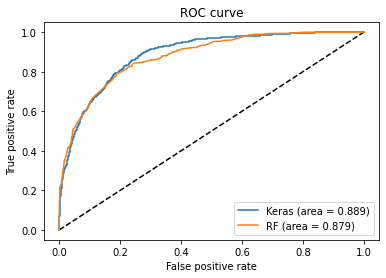

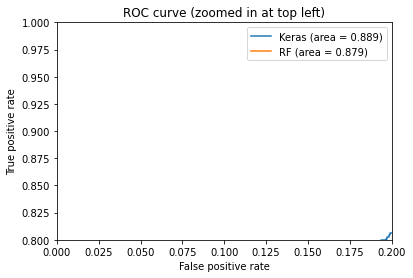

In [35]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()